<a href="https://colab.research.google.com/github/hbendeguz/Notebooks/blob/master/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [20]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [23]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks"

 data_0_31.npy	 'Preproc (1).ipynb'   train.npy	       Untitled0.ipynb
 data_32_63.npy   Preproc.ipynb        train_transaction.csv   Untitled1.ipynb
 fraud.ipynb	  test.npy	       tr_iv.csv


In [0]:
dt_iv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tr_iv.csv')

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_transaction.csv')

In [29]:
! pip install scorecardpy

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.1.1-cp36-none-any.whl size=58169 sha256=6114c3cd18452f0668b07605c08c2a434c8b064275cee4c51da4affabdb8c006
  Stored in directory: /root/.cache/pip/wheels/8f/4c/98/567ff70984acd88ffae211d8fc209e34b98fb43ff27f09fdd3
Successfully built scorecardpy


In [30]:
df_reduced = df[dt_iv[dt_iv.info_value > 0.15].variable]
df_reduced.head()

,TransactionAmt,V307,V308,card1,V127,V317,V306,V128,V310,V318,V133,V126,V316,V314,V134,C4,V130,C12,C8,card2,C7,V132,V315,V312,C10,V313,V320,V45,V52,V321,V94,V79,addr1,V51,V34,V44,V74,V87,V33,V70,...,V95,V77,V5,M3,V3,V280,M2,V9,V293,V97,V4,V7,card6,V2,V8,V279,V6,M1,V1,V129,V54,V23,V47,V53,V67,V96,V123,V13,V62,V24,V56,M9,V76,V12,M8,P_emaildomain,M7,V75,V36,V125
0,68.5,117.0,0.0,13926,117.0,117.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,315.0,NaN,0.0,NaN,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,T,1.0,0.0,T,1.0,0.0,0.0,1.0,1.0,credit,1.0,1.0,0.0,1.0,T,1.0,0.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
1,29.0,0.0,0.0,2755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,325.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,credit,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,0.0,0.0,NaN,gmail.com,NaN,0.0,0.0,1.0
2,59.0,0.0,0.0,4663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,490.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,330.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,T,1.0,0.0,T,1.0,0.0,0.0,1.0,1.0,debit,1.0,1.0,0.0,1.0,T,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,F,1.0,1.0,F,outlook.com,F,1.0,1.0,1.0
3,50.0,1758.0,925.0,18132,1758.0,1404.0,50.0,925.0,354.0,790.0,1404.0,50.0,50.0,0.0,790.0,0.0,354.0,0.0,0.0,567.0,0.0,50.0,0.0,135.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,476.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,NaN,NaN,NaN,28.0,NaN,NaN,1.0,28.0,NaN,NaN,debit,NaN,NaN,1.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,48.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,yahoo.com,NaN,1.0,1.0,1.0
4,50.0,0.0,0.0,4497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,514.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,credit,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gmail.com,NaN,NaN,NaN,1.0


In [0]:
import scorecardpy as sc

df = df.dropna(axis = 1,thresh= int(0.3 *len(df)))


In [38]:
shape(df)

(590540, 226)

In [0]:
info_values = sc.iv(df, y="isFraud")



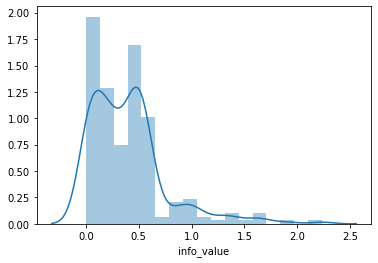

In [40]:
import seaborn as sn

sn.distplot(info_values.info_value)

In [44]:
len(info_values[info_values.info_value > 0.15])

161

In [0]:
info_values.to_csv('/content/drive/My Drive/Colab Notebooks/info_values.csv')

In [0]:
df_reduced = df[info_values[info_values.info_value > 0.15].variable]

In [50]:
shape(df_reduced)

(590540, 162)

In [49]:
import scorecardpy as sc
df_reduced['isFraud'] = df['isFraud']

bins = sc.woebin(df_reduced, y="isFraud", bin_num_limit = 4, print_step=1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
P_emaildomain
>>> Continue the binning process?
1: yes 
2: no
Selection: 1


/usr/local/lib/python3.6/dist-packages/scorecardpy/woebin.py:725: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  binning = pd.concat(bin_list, keys=bin_list.keys()).reset_index()\


Binning on 590540 rows and 162 columns in 00:07:52


In [0]:
ivs = pd.DataFrame({'var': ['init'], 'iv': [0] })
for i in bins.keys():
  ivs = ivs.append(pd.DataFrame({'var': [i], 'iv': [bins[i].total_iv[0]] }))
 # bins[i].total_iv

In [72]:
ivs.head()

,var,iv
0,init,0.000000
0,V308,0.147391
0,V56,0.172573
0,V321,0.000135
0,V92,0.510250


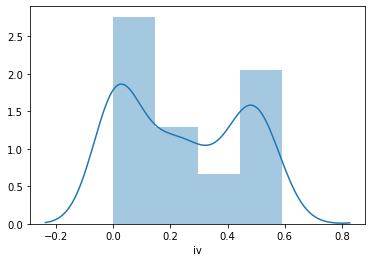

In [73]:
sn.distplot(ivs.iv)

In [0]:
ivs.to_csv('/content/drive/My Drive/Colab Notebooks/info_values_binning.csv')

In [78]:
ivs[ivs.iv > 0.1]['var']

0     V308
0      V56
0      V92
0       M7
0    addr1
     ...  
0       V7
0      V53
0      D15
0       M3
0      V58
Name: var, Length: 104, dtype: object

In [91]:
df_to_woe = df_reduced[ivs[ivs.iv > 0.1]['var']]
shape(df_to_woe)

(590540, 104)

In [92]:
df_to_woe['isFraud'] = df_reduced['isFraud']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
import pickle
f = open("/content/drive/My Drive/Colab Notebooks/bins.pkl","wb")
pickle.dump(bins,f)
f.close()

In [90]:
shape(df_to_woe)

(590540,)

In [0]:
df_to_woe = df_to_woe.drop('isFraud', axis = 1)

In [94]:
df_woe = sc.woebin_ply(df_to_woe, bins)

[INFO] converting into woe values ...
Woe transformating on 590540 rows and 104 columns in 00:03:25


In [0]:
c = df_woe.corr().abs()

In [96]:
c

,V308_woe,V56_woe,V92_woe,M7_woe,addr1_woe,V64_woe,C1_woe,V42_woe,M4_woe,V2_woe,V43_woe,V13_woe,V10_woe,V71_woe,C2_woe,V1_woe,V40_woe,V9_woe,V15_woe,V29_woe,C11_woe,V4_woe,D2_woe,V72_woe,V74_woe,V16_woe,D4_woe,V93_woe,V59_woe,V78_woe,V50_woe,V60_woe,V81_woe,ProductCD_woe,V38_woe,V70_woe,V57_woe,V6_woe,V282_woe,V49_woe,...,V79_woe,V39_woe,M8_woe,V69_woe,P_emaildomain_woe,M9_woe,V94_woe,V303_woe,C5_woe,V5_woe,V90_woe,V8_woe,V73_woe,V32_woe,D3_woe,dist1_woe,V87_woe,V54_woe,V304_woe,V283_woe,V36_woe,V18_woe,V48_woe,M2_woe,V51_woe,V302_woe,C13_woe,V63_woe,V280_woe,V12_woe,V52_woe,D11_woe,D1_woe,card3_woe,M6_woe,V7_woe,V53_woe,D15_woe,M3_woe,V58_woe
V308_woe,1.000000,0.164795,0.057348,0.004760,0.033834,0.048660,0.088834,0.039204,0.074615,0.027450,0.038930,0.098074,0.070637,0.056648,0.153400,0.027450,0.038772,0.027450,0.071328,0.139003,0.107583,0.027442,0.011991,0.055646,0.024665,0.071370,0.024765,0.057346,0.049989,0.136771,0.044013,0.048876,0.052725,0.046812,0.146981,0.129412,0.074592,0.027450,0.162118,0.128968,...,0.064836,0.039025,0.001474,0.131514,0.026447,0.001317,0.046914,0.055940,0.114490,0.027515,0.141159,0.027450,0.050851,0.051714,0.396027,0.070572,0.027162,0.115598,0.056488,0.247315,0.068924,0.049948,0.129457,0.019237,0.027344,0.058561,0.046612,0.049942,0.885216,0.071082,0.010828,0.036453,0.077686,0.051406,0.056946,0.027450,0.083406,0.065763,0.017026,0.073538
V56_woe,0.164795,1.000000,0.389751,0.264727,0.099963,0.456831,0.114189,0.266443,0.037819,0.337876,0.267977,0.351080,0.288790,0.451411,0.028938,0.337876,0.269466,0.337876,0.388149,0.285852,0.073738,0.337875,0.233155,0.453504,0.454007,0.388133,0.113364,0.389763,0.453378,0.611024,0.267925,0.455753,0.390700,0.376224,0.424218,0.320682,0.456495,0.337876,0.315915,0.182346,...,0.361017,0.268126,0.261790,0.322604,0.017179,0.259412,0.357537,0.549339,0.287604,0.337425,0.269996,0.337876,0.452575,0.416724,0.235697,0.247888,0.282343,0.410663,0.548655,0.336060,0.125896,0.416342,0.182109,0.337836,0.248339,0.546662,0.182148,0.454128,0.188149,0.350854,0.249311,0.305642,0.220618,0.068603,0.502943,0.337876,0.425086,0.258980,0.333848,0.458712
V92_woe,0.057348,0.389751,1.000000,0.450517,0.761304,0.902047,0.137125,0.840472,0.501971,0.601861,0.841785,0.568810,0.466367,0.945993,0.018053,0.601861,0.844758,0.601861,0.915265,0.388803,0.082826,0.601861,0.261100,0.947434,0.865596,0.915429,0.211284,0.999965,0.902271,0.375239,0.896751,0.904063,0.944223,0.934809,0.282763,0.408485,0.918819,0.601861,0.251198,0.332898,...,0.938711,0.843610,0.441891,0.407073,0.224720,0.434339,0.909527,0.856493,0.405763,0.600036,0.400105,0.601861,0.886238,0.955051,0.234794,0.406115,0.257457,0.594490,0.854827,0.212539,0.462857,0.905121,0.332052,0.558133,0.836836,0.853230,0.237020,0.900027,0.026843,0.549163,0.820817,0.525946,0.270532,0.722832,0.823038,0.601861,0.574436,0.368538,0.551237,0.920268
M7_woe,0.004760,0.264727,0.450517,1.000000,0.296110,0.455970,0.077218,0.379149,0.176610,0.747880,0.379767,0.470690,0.633205,0.468177,0.042151,0.747880,0.381375,0.747880,0.432540,0.263695,0.059141,0.747891,0.090911,0.468625,0.429450,0.432604,0.078068,0.450528,0.456032,0.211490,0.397569,0.456515,0.434784,0.445460,0.148816,0.280601,0.452191,0.747880,0.092109,0.214255,...,0.428669,0.380830,0.968357,0.279492,0.072484,0.955562,0.418742,0.469306,0.267018,0.744205,0.262131,0.747880,0.439413,0.456871,0.102845,0.452529,0.170608,0.493861,0.468582,0.076006,0.379795,0.444350,0.214058,0.731839,0.376868,0.467801,0.117723,0.455412,0.012609,0.463383,0.370641,0.644202,0.096706,0.276350,0.450189,0.747880,0.485767,0.155429,0.726834,0.452646
addr1_woe,0.033834,0.099963,0.761304,0.296110,1.000000,0.674357,0.061722,0.746594,0.726468,0.369436,0.747675,0.331347,0.293449,0.703158,0.089943,0.369436,0.748602,0.369436,0.802280,0.254459,0.007857,0.369435,0.175173,0.704941,0.698680,0.802110,0.166113,0.761282,0.674331,0.188622,0.788711,0.676811,0.718138,0.808128,0.231030,0.242115,0.745261,0.369436,0.160255,0.263743,...,0.816828,0.747612,0.290087,0.240534,0.286095,0

In [0]:
c.to_csv('/content/drive/My Drive/Colab Notebooks/correlation.csv')

In [99]:
s = c.unstack()
so = s.sort_values(kind="quicksort")
so

V36_woe   D3_woe      0.000205
D3_woe    V36_woe     0.000205
V280_woe  M3_woe      0.000365
M3_woe    V280_woe    0.000365
V76_woe   C2_woe      0.000782
                        ...   
V17_woe   V17_woe     1.000000
V3_woe    V7_woe      1.000000
          V8_woe      1.000000
D15_woe   D15_woe     1.000000
V58_woe   V58_woe     1.000000
Length: 10816, dtype: float64

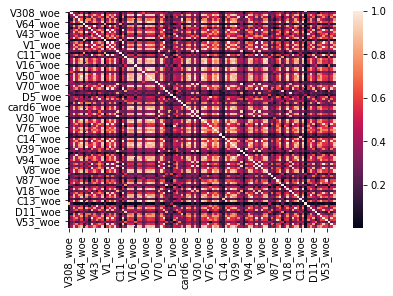

In [100]:
sn.heatmap(c)

In [119]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(df_woe[:280_000], df.isFraud[:280000])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
train_pred = lr.predict_proba(df_woe[280000:])[:,1]


In [0]:
from sklearn.metrics import roc_auc_score, confusion_matrix

auc = roc_auc_score(df.isFraud[280000:], train_pred)
#conf = confusion_matrix(df.isFraud, np.where(train_pred > 0.5,1,0) )

In [123]:
auc

0.8337943274718083

In [108]:
conf

array([[568900,    977],
       [ 17209,   3454]])

In [111]:
conf = confusion_matrix(df.isFraud, np.where(train_pred > 0.75,1,0) )
conf

array([[569784,     93],
       [ 19773,    890]])

In [0]:
from sklearn.metrics import precision_recall_curve
p, r, th = precision_recall_curve(df.isFraud, train_pred)

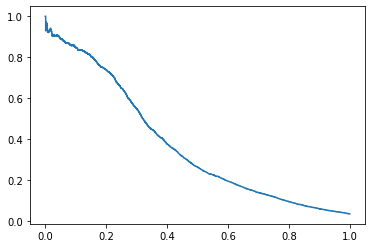

In [116]:
plot(r, p)

In [117]:
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_transaction.csv')
y_test = df_test['isFraud']
df_woe_test = sc.woebin_ply(df_test[ivs[ivs.iv > 0.1]['var']], bins)

test_pred = lr.predict_proba(df_woe_test)[:,1]

auc = roc_auc_score(y_test, test_pred)


KeyError: ignored